In [ ]:
import os
import pandas as pd

# 경로 설정
train_root = './train'

# 클래스별 이미지 수 계산
class_counts = []
for class_name in sorted(os.listdir(train_root)):
    class_path = os.path.join(train_root, class_name)
    if os.path.isdir(class_path):
        img_count = len([f for f in os.listdir(class_path) if f.lower().endswith('.jpg')])
        class_counts.append((class_name, img_count))

# DataFrame 생성
df = pd.DataFrame(class_counts, columns=["모델 명", "이미지 수"])

# 최대, 최소값 계산
max_count = df["이미지 수"].max()
min_count = df["이미지 수"].min()

# 최대 이미지 수의 행들
max_rows = df[df["이미지 수"] == max_count].copy()
max_rows["모델 명"] = "최대 이미지 수 (" + ", ".join(max_rows["모델 명"]) + ")"

# 최소 이미지 수의 행들
min_rows = df[df["이미지 수"] == min_count].copy()
min_rows["모델 명"] = "최소 이미지 수 (" + ", ".join(min_rows["모델 명"]) + ")"

# 행 추가
df_final = pd.concat([df, max_rows.iloc[[0]], min_rows.iloc[[0]]], ignore_index=True)

# CSV 저장
output_path = "class_image_counts.csv"
df_final.to_csv(output_path, index=False, encoding='utf-8-sig')

df_final.tail(5)

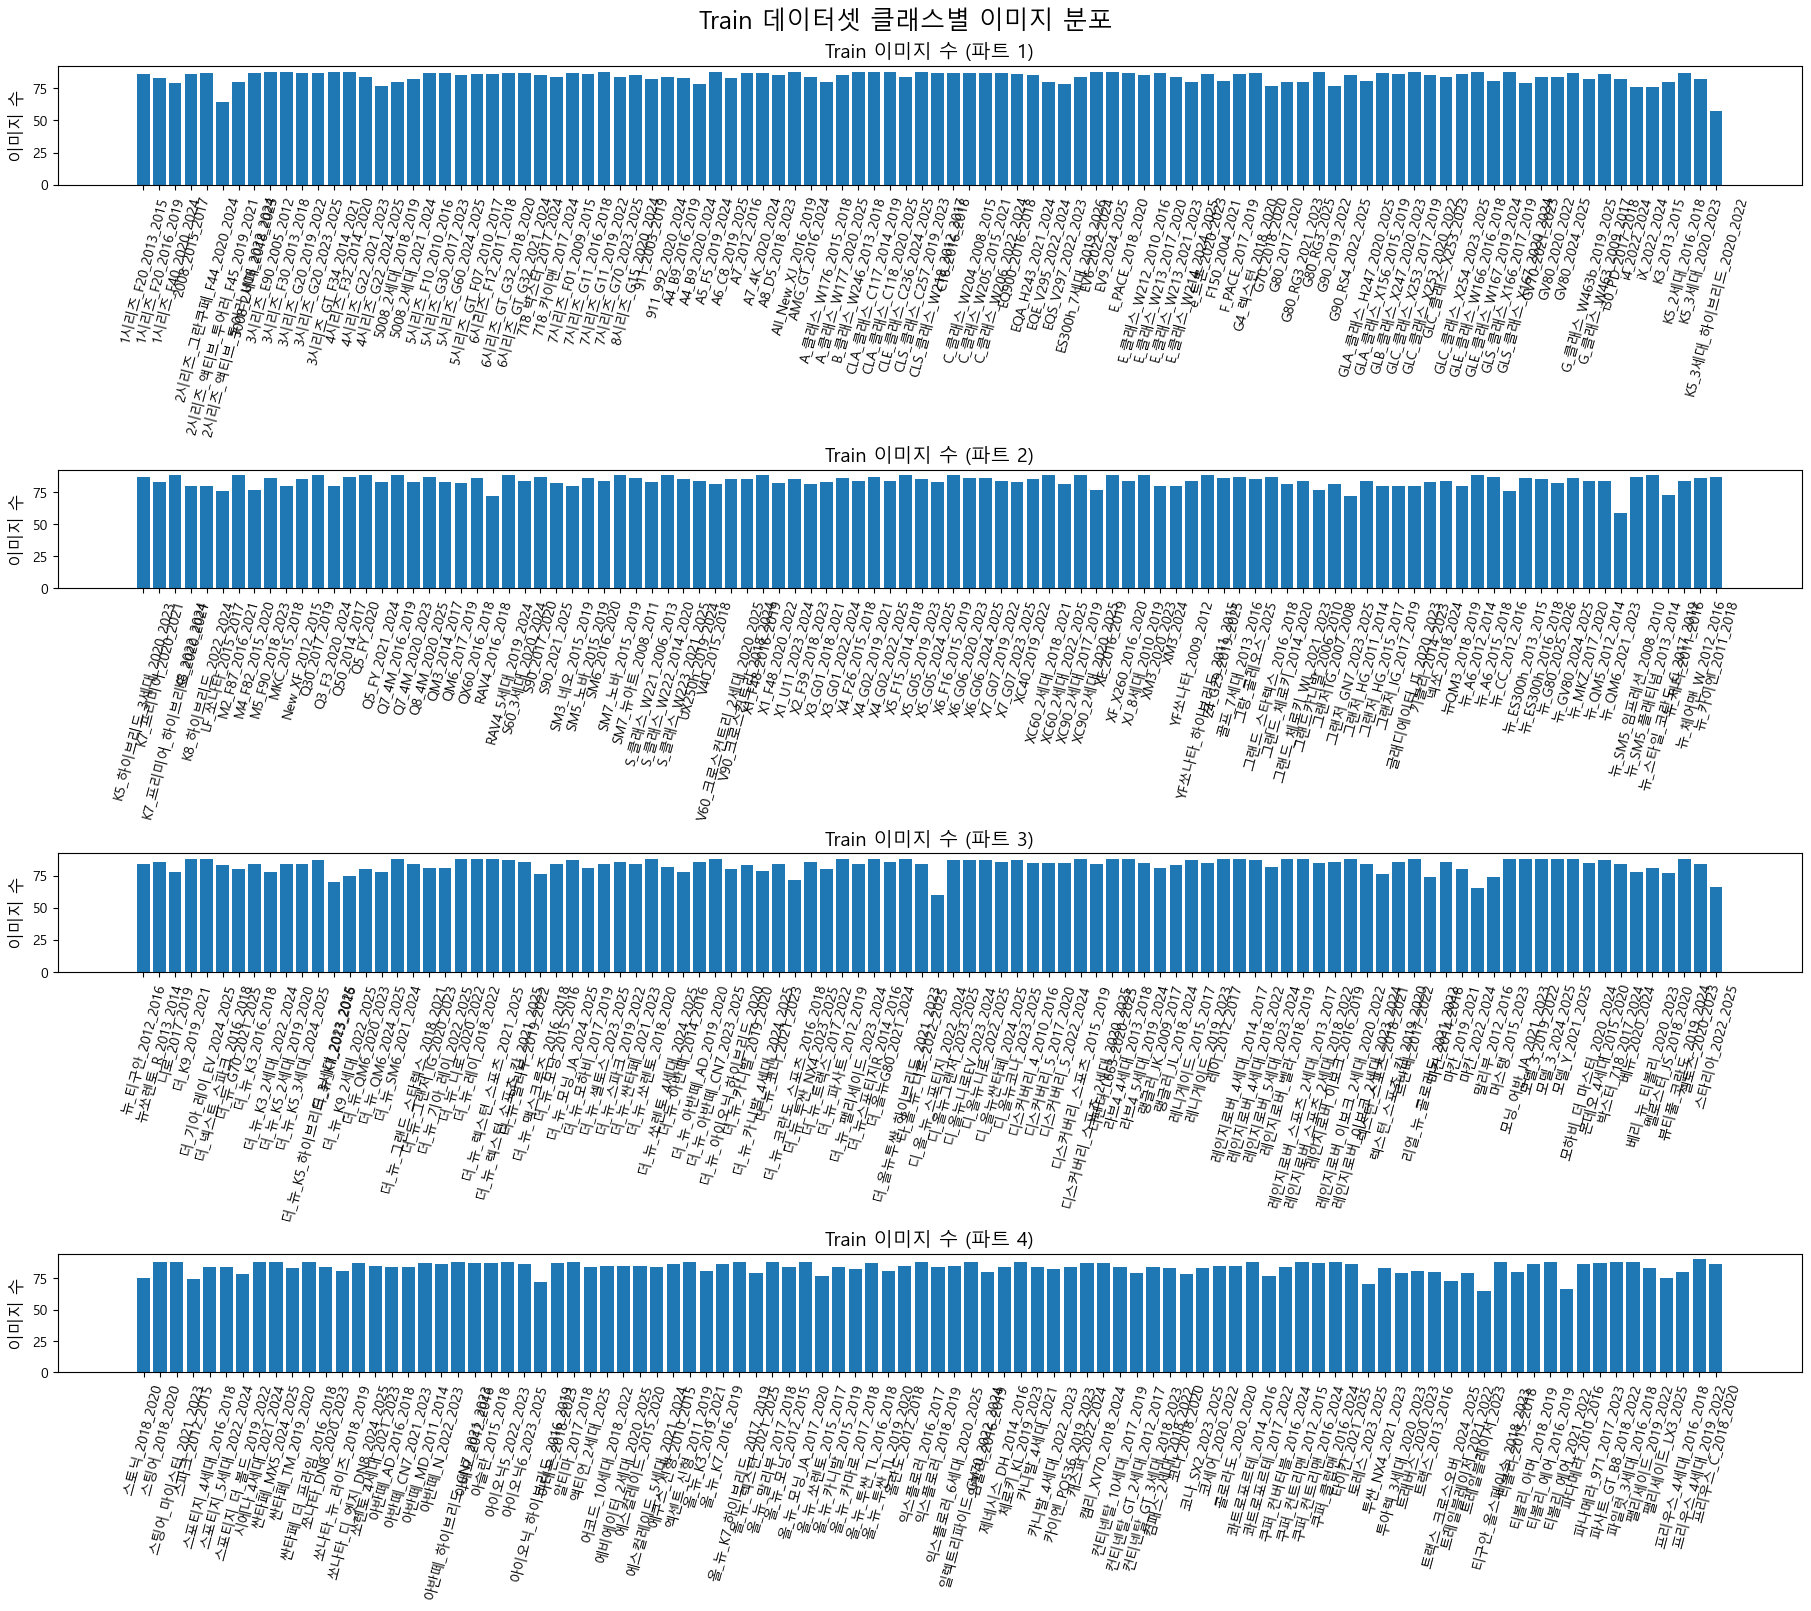

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

# 한글 폰트 설정 (윈도우 기준 예시: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# train 디렉토리 경로
train_root = "./train"

# 클래스별 이미지 수 계산
class_counts = {}
for class_name in os.listdir(train_root):
    class_path = os.path.join(train_root, class_name)
    if os.path.isdir(class_path):
        image_count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = image_count

# 시각화: 한 차트에 너무 많으면 나누기
class_names = list(class_counts.keys())
counts = list(class_counts.values())

n_parts = 4  # 나눌 파트 수 증가
split_size = len(class_names) // n_parts + 1

fig, axes = plt.subplots(n_parts, 1, figsize=(18, 16), constrained_layout=True)

for i in range(n_parts):
    start = i * split_size
    end = min((i + 1) * split_size, len(class_names))
    part_classes = class_names[start:end]
    part_counts = counts[start:end]

    axes[i].bar(part_classes, part_counts)
    axes[i].set_title(f"Train 이미지 수 (파트 {i+1})", fontsize=14)
    axes[i].set_ylabel("이미지 수", fontsize=12)
    axes[i].tick_params(axis='x', rotation=75)

plt.suptitle("Train 데이터셋 클래스별 이미지 분포", fontsize=18)
plt.show()

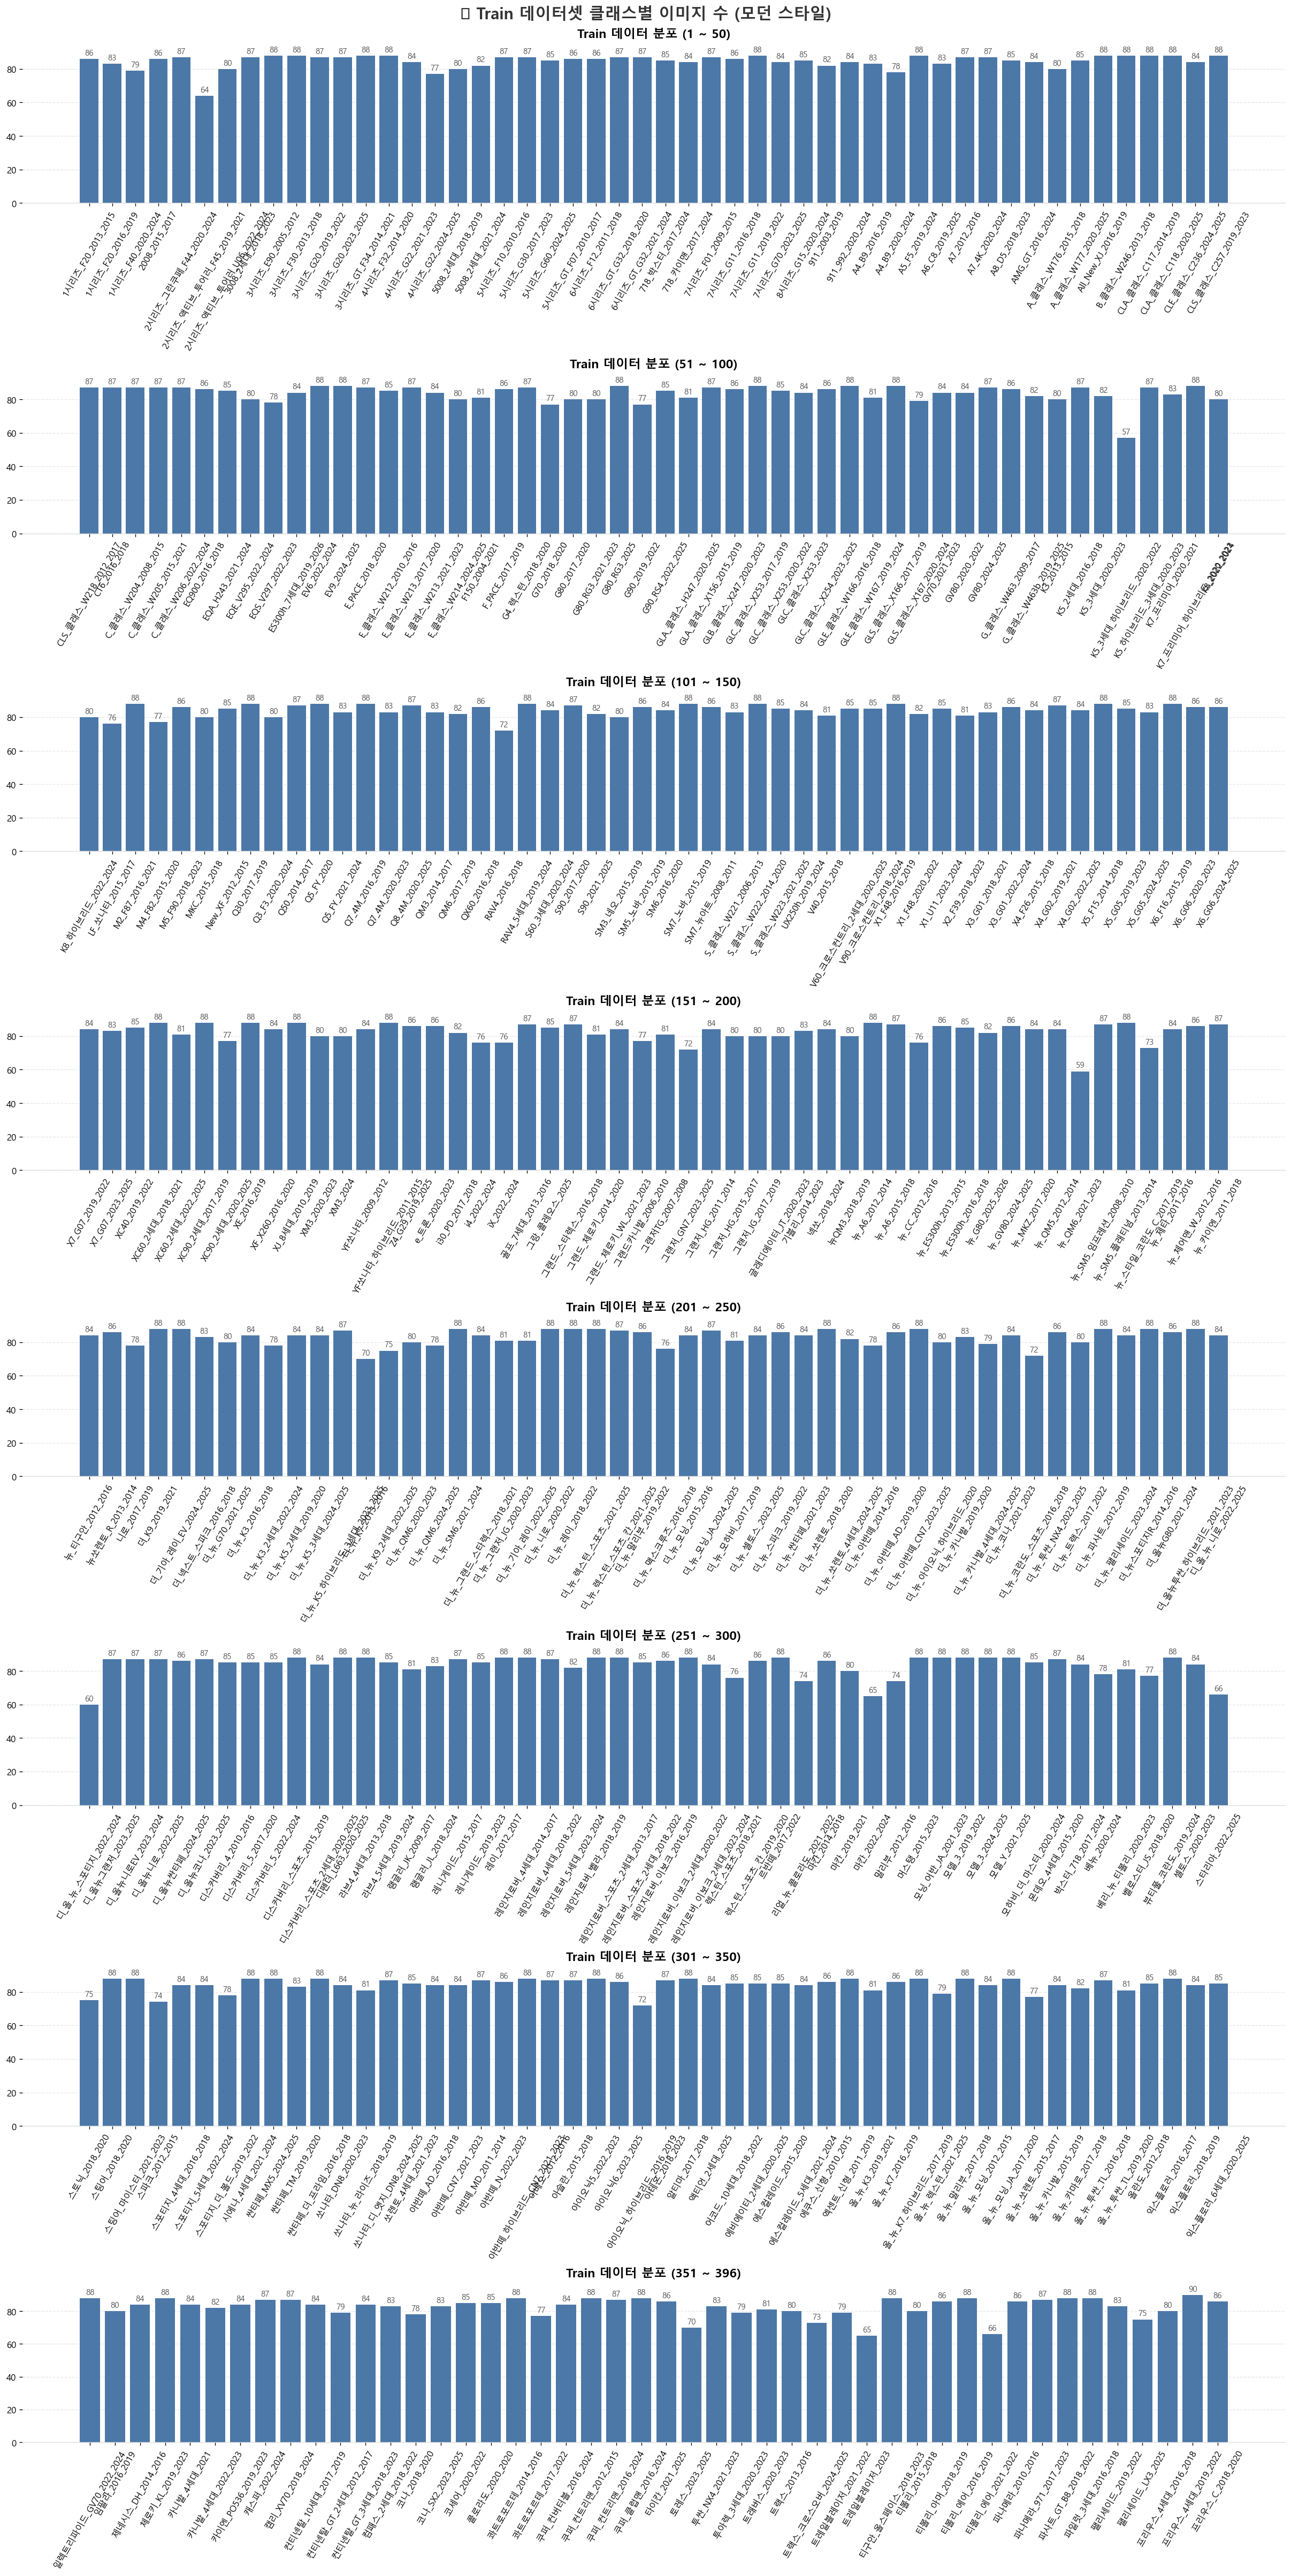

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 (mac은 AppleGothic, Windows는 Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 120  # 고해상도
plt.rcParams['axes.edgecolor'] = '#dddddd'
plt.rcParams['axes.linewidth'] = 0.8

# 경로
train_root = "./train"

# 클래스별 이미지 수 계산
class_counts = {}
for class_name in sorted(os.listdir(train_root)):
    path = os.path.join(train_root, class_name)
    if os.path.isdir(path):
        count = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = count

# 데이터 분할
class_names = list(class_counts.keys())
counts = list(class_counts.values())
n_per_plot = 50
n_parts = (len(class_names) + n_per_plot - 1) // n_per_plot

# 모던한 색상 톤 (그레이 + 블루 계열)
colors = ['#4C78A8'] * n_per_plot

# 시각화
fig, axes = plt.subplots(n_parts, 1, figsize=(20, n_parts * 5), constrained_layout=True)
if n_parts == 1:
    axes = [axes]

for i in range(n_parts):
    start = i * n_per_plot
    end = min((i + 1) * n_per_plot, len(class_names))
    part_classes = class_names[start:end]
    part_counts = counts[start:end]

    ax = axes[i]
    bars = ax.bar(part_classes, part_counts, color=colors[:len(part_counts)])

    for bar, value in zip(bars, part_counts):
        ax.text(bar.get_x() + bar.get_width() / 2, value + 1, str(value),
                ha='center', va='bottom', fontsize=9, color='#555555')

    ax.set_title(f"Train 데이터 분포 ({start+1} ~ {end})", fontsize=14, weight='semibold', pad=12)
    ax.tick_params(axis='x', rotation=60)
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)

# 최종 타이틀
plt.suptitle("Train 데이터셋 클래스별 이미지 수 (모던 스타일)", fontsize=18, weight='bold', color='#333333')
plt.show()

ValueError: '#F64A70B' is not a valid color value.

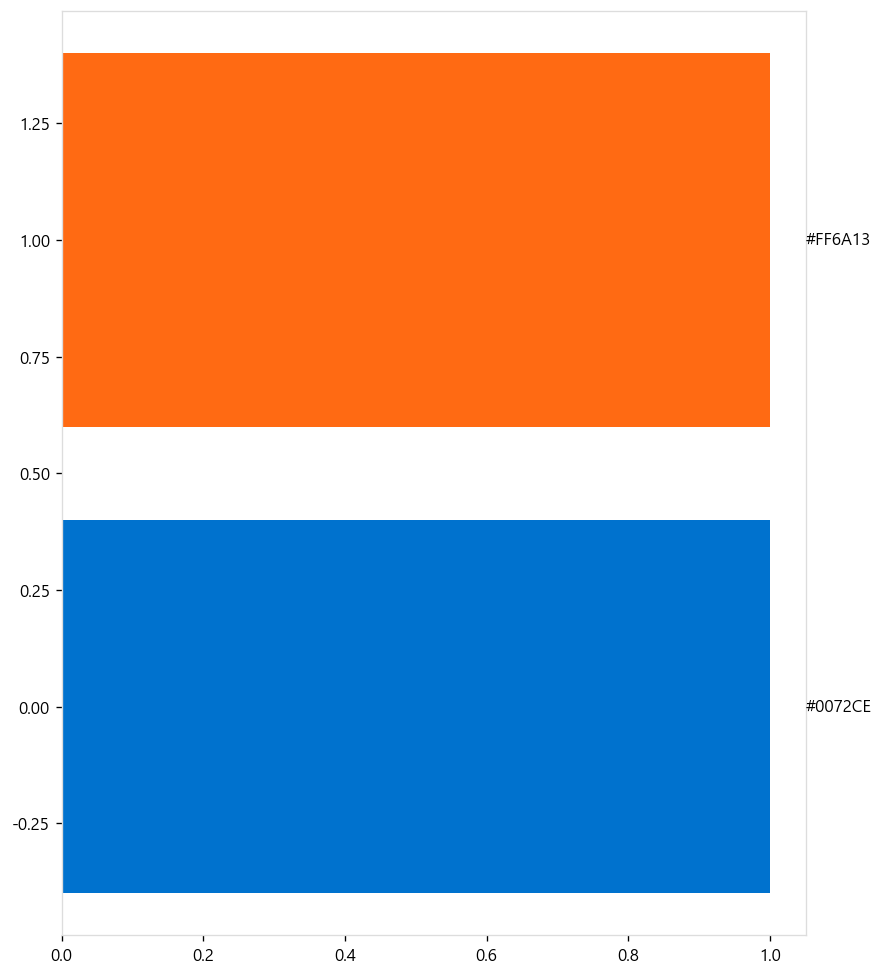

In [14]:
import matplotlib.pyplot as plt

# 트렌디한 20가지 색상 정의
trendy_colors_20 = [
    "#0072CE", "#FF6A13", "#F64A70B", "#EF4A81", "#FFC600",
    "#FFBE98", "#70A1FF", "#A29BFE", "#FFB8B8", "#DFF9FB",
    "#E77F67", "#778BE3", "#E15F41", "#B8E994", "#F6D365",
    "#F5A9B8", "#C3A995", "#82CCDD", "#F8EFBA", "#D6A2E8"
]

# 시각화
fig, ax = plt.subplots(figsize=(8, 10))
for i, color in enumerate(trendy_colors_20):
    ax.barh(i, 1, color=color)
    ax.text(1.05, i, f"{color}", va='center', fontsize=10)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(0, 2)
ax.set_title("Trendy 20 Color Palette", fontsize=14)
plt.tight_layout()
plt.show()

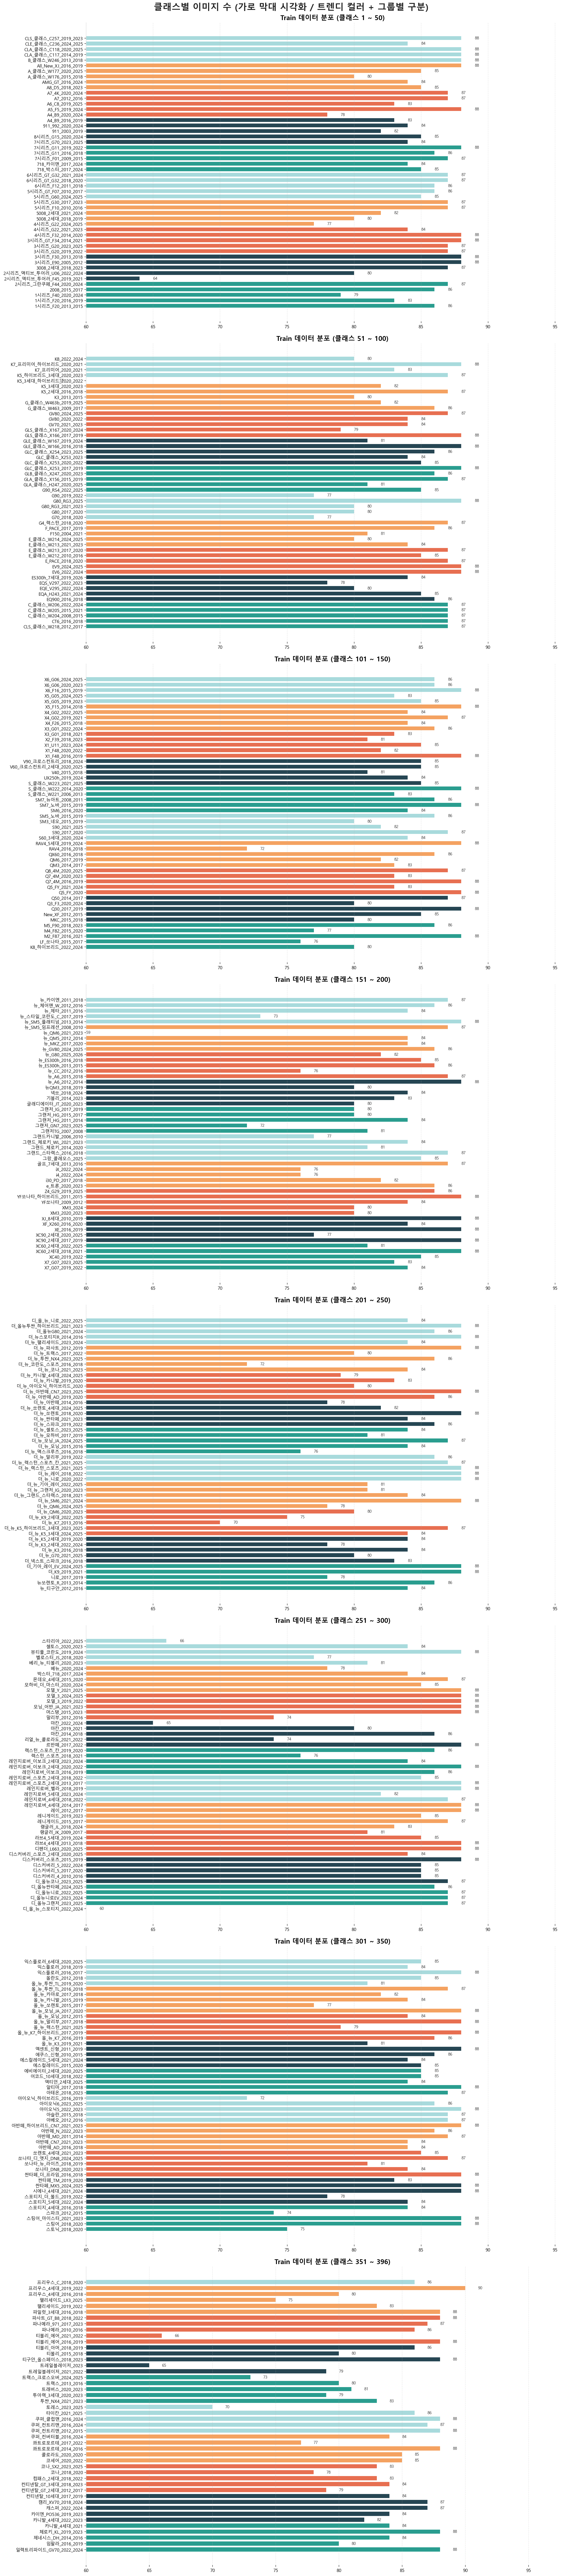

In [28]:
import os
import matplotlib.pyplot as plt

# 한글 폰트 및 그래픽 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 120

# 데이터 경로 설정
train_root = "./train"
class_counts = {
    class_name: len([
        f for f in os.listdir(os.path.join(train_root, class_name))
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    for class_name in sorted(os.listdir(train_root))
    if os.path.isdir(os.path.join(train_root, class_name))
}

# 클래스명 및 이미지 수 추출
class_names = list(class_counts.keys())
counts = list(class_counts.values())

# 트렌디한 색상 5종을 5개 단위로 반복 적용
base_colors = ['#2A9D8F', '#264653', '#E76F51', '#F4A261', '#A8DADC']
colors = [base_colors[i // 5 % len(base_colors)] for i in range(len(class_names))]

# 그래프 분할 설정
n_per_plot = 50
n_parts = (len(class_names) + n_per_plot - 1) // n_per_plot
fig, axes = plt.subplots(n_parts, 1, figsize=(18, n_parts * 10), constrained_layout=True)
if n_parts == 1:
    axes = [axes]

# 그래프 그리기
for i in range(n_parts):
    start = i * n_per_plot
    end = min((i + 1) * n_per_plot, len(class_names))
    part_classes = class_names[start:end]
    part_counts = counts[start:end]
    part_colors = colors[start:end]

    ax = axes[i]
    y_positions = range(len(part_classes))
    bars = ax.barh(
        y=y_positions,
        width=part_counts,
        color=part_colors,
        height=0.7
    )

    ax.set_yticks(y_positions)
    ax.set_yticklabels(part_classes)

    for bar, count in zip(bars, part_counts):
        ax.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count),
                va='center', fontsize=9, color='#333')

    ax.set_title(f"Train 데이터 분포 (클래스 {start+1} ~ {end})", fontsize=15, weight='bold')
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.set_xlim(60, max(part_counts) * 1.1)

# 전체 제목
plt.suptitle("클래스별 이미지 수 (가로 막대 시각화 / 트렌디 컬러 + 그룹별 구분)", 
             fontsize=20, weight='bold', color='#222')

plt.show()


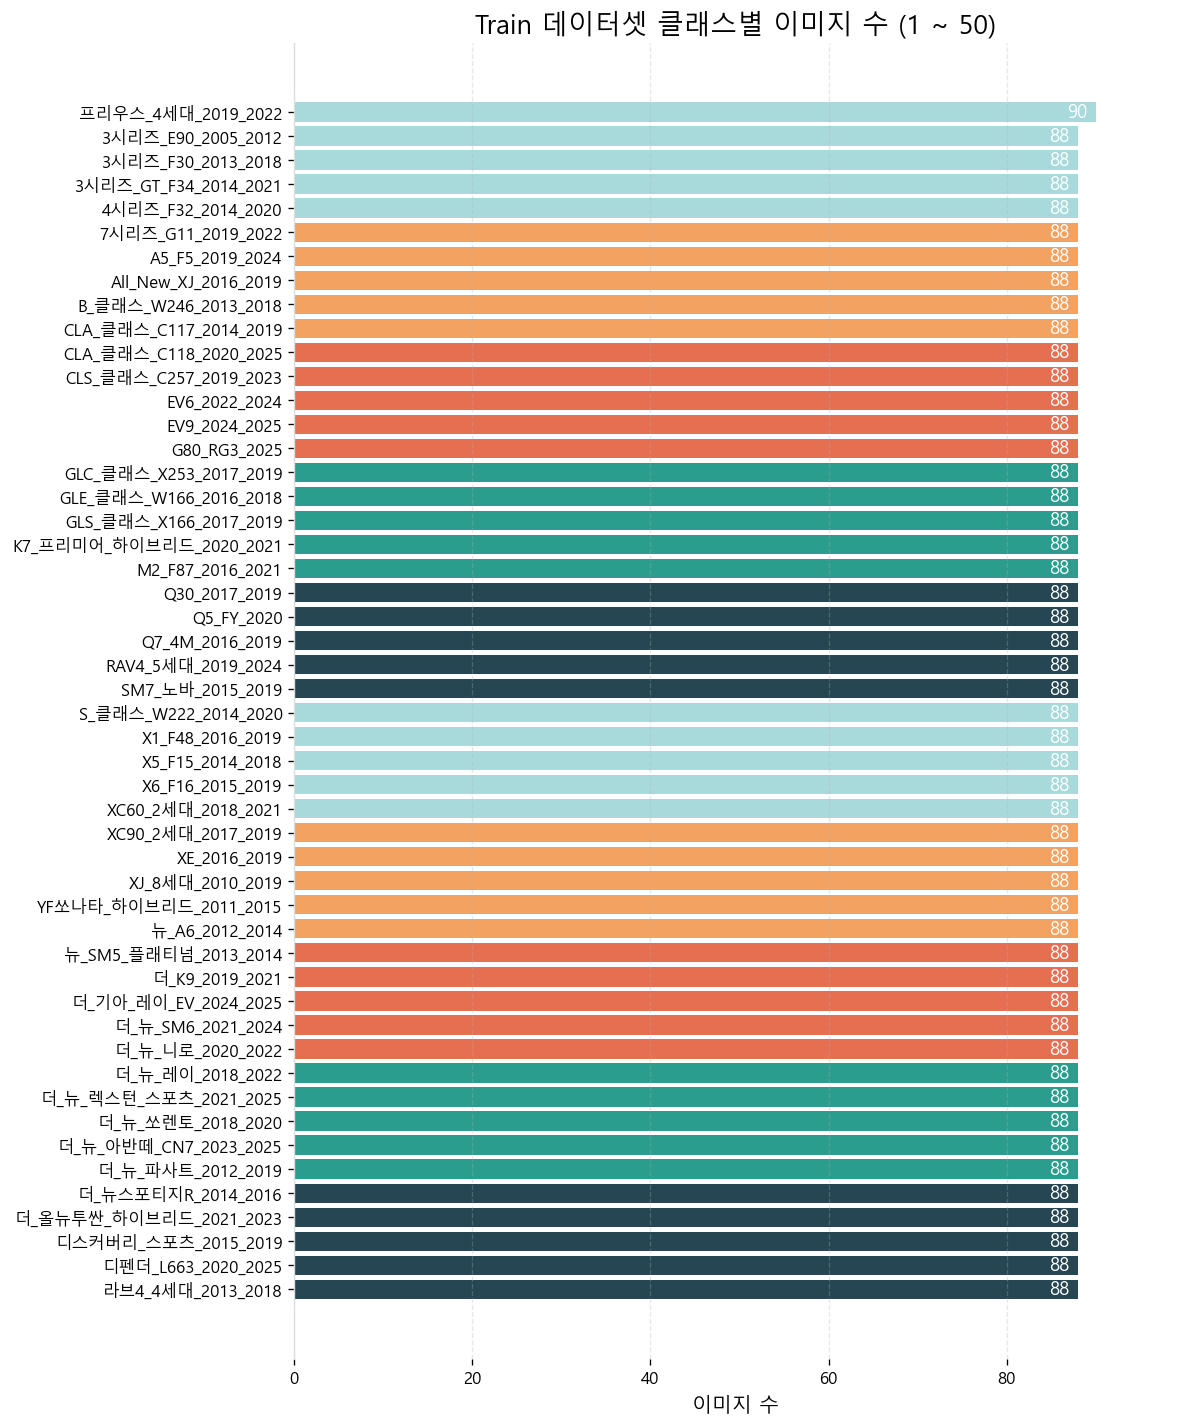

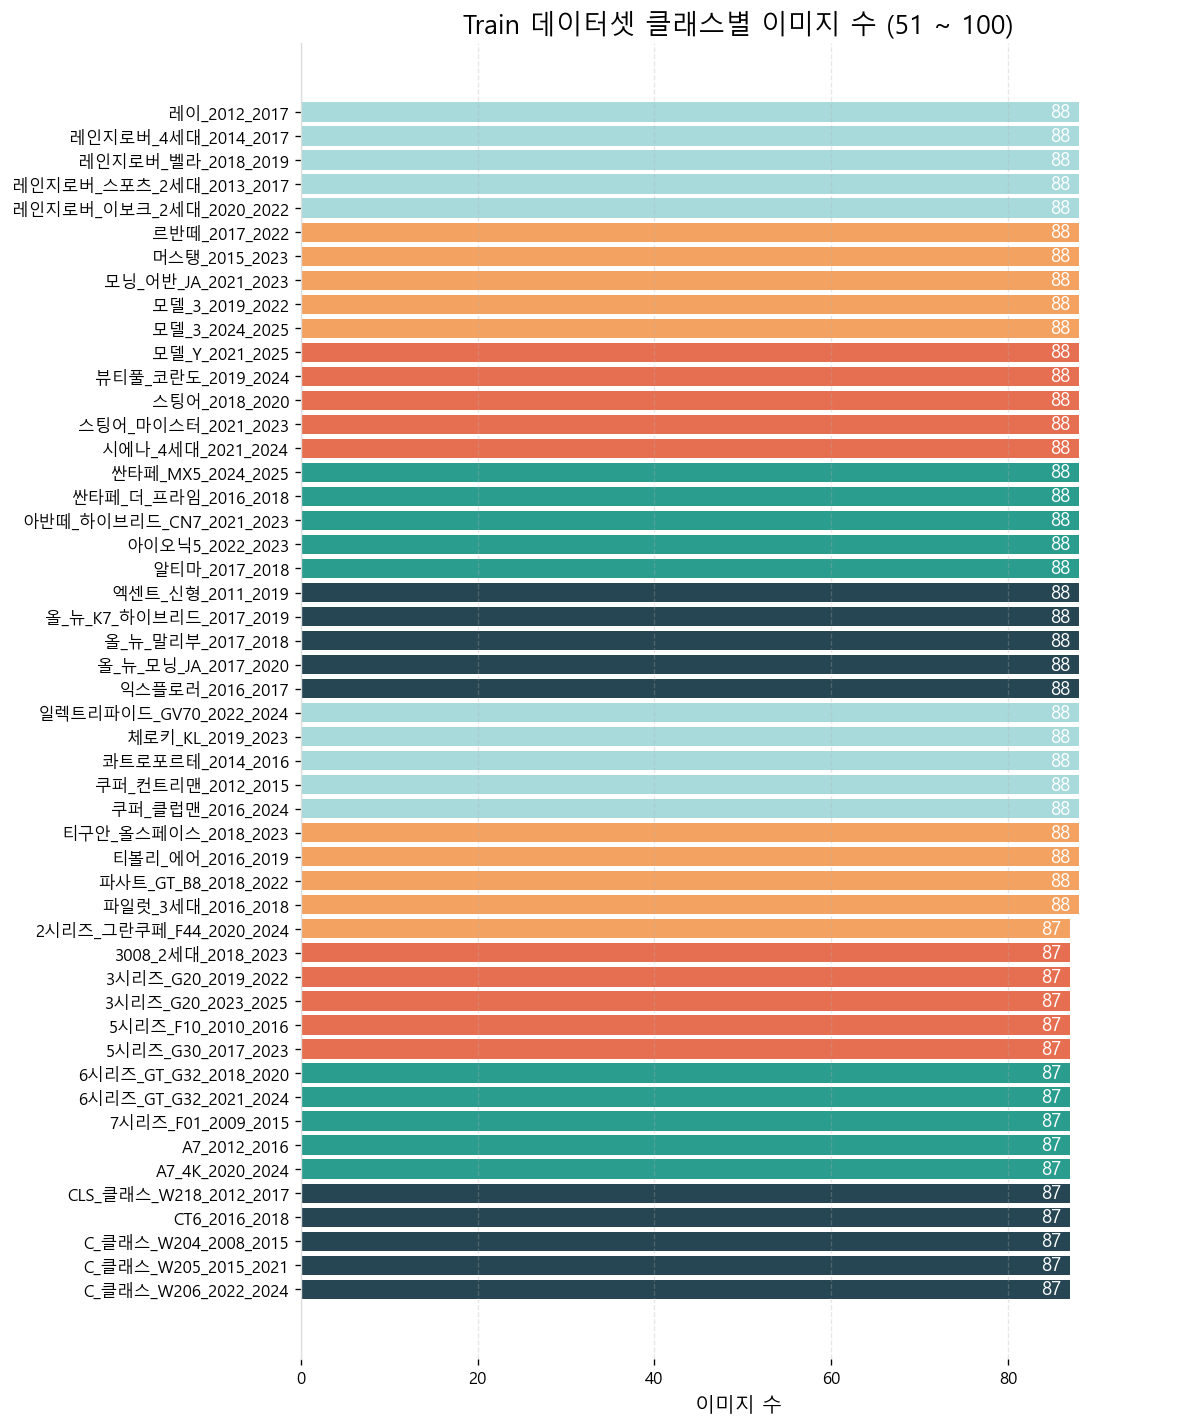

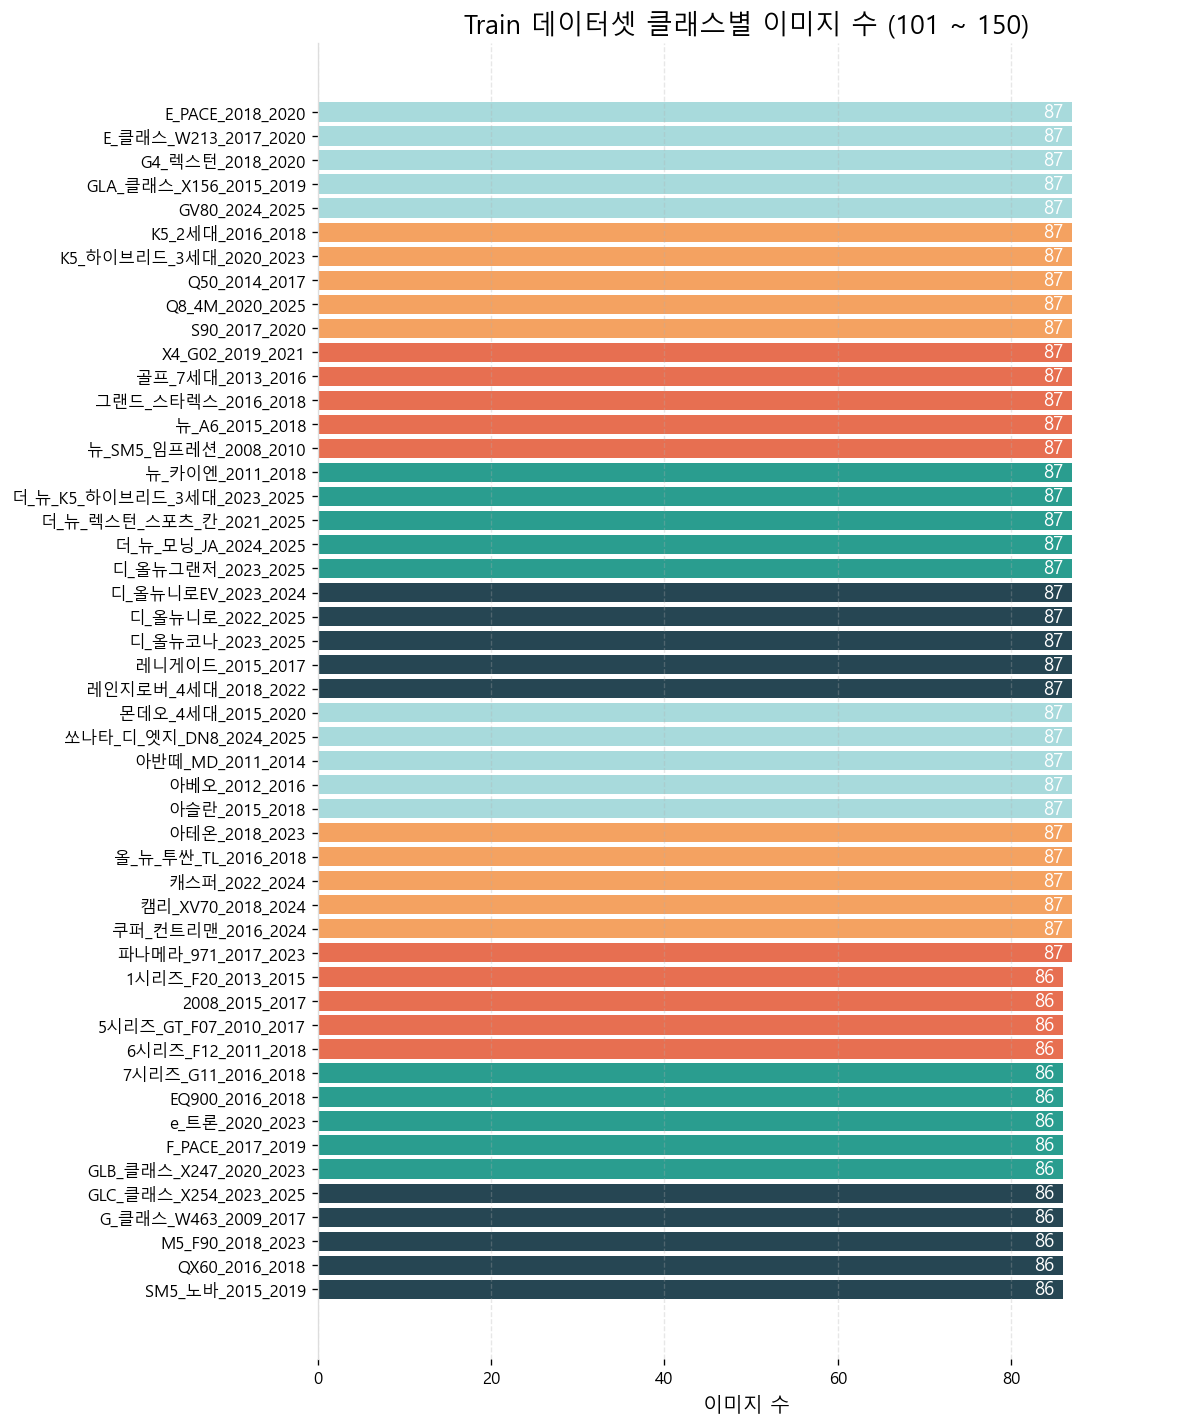

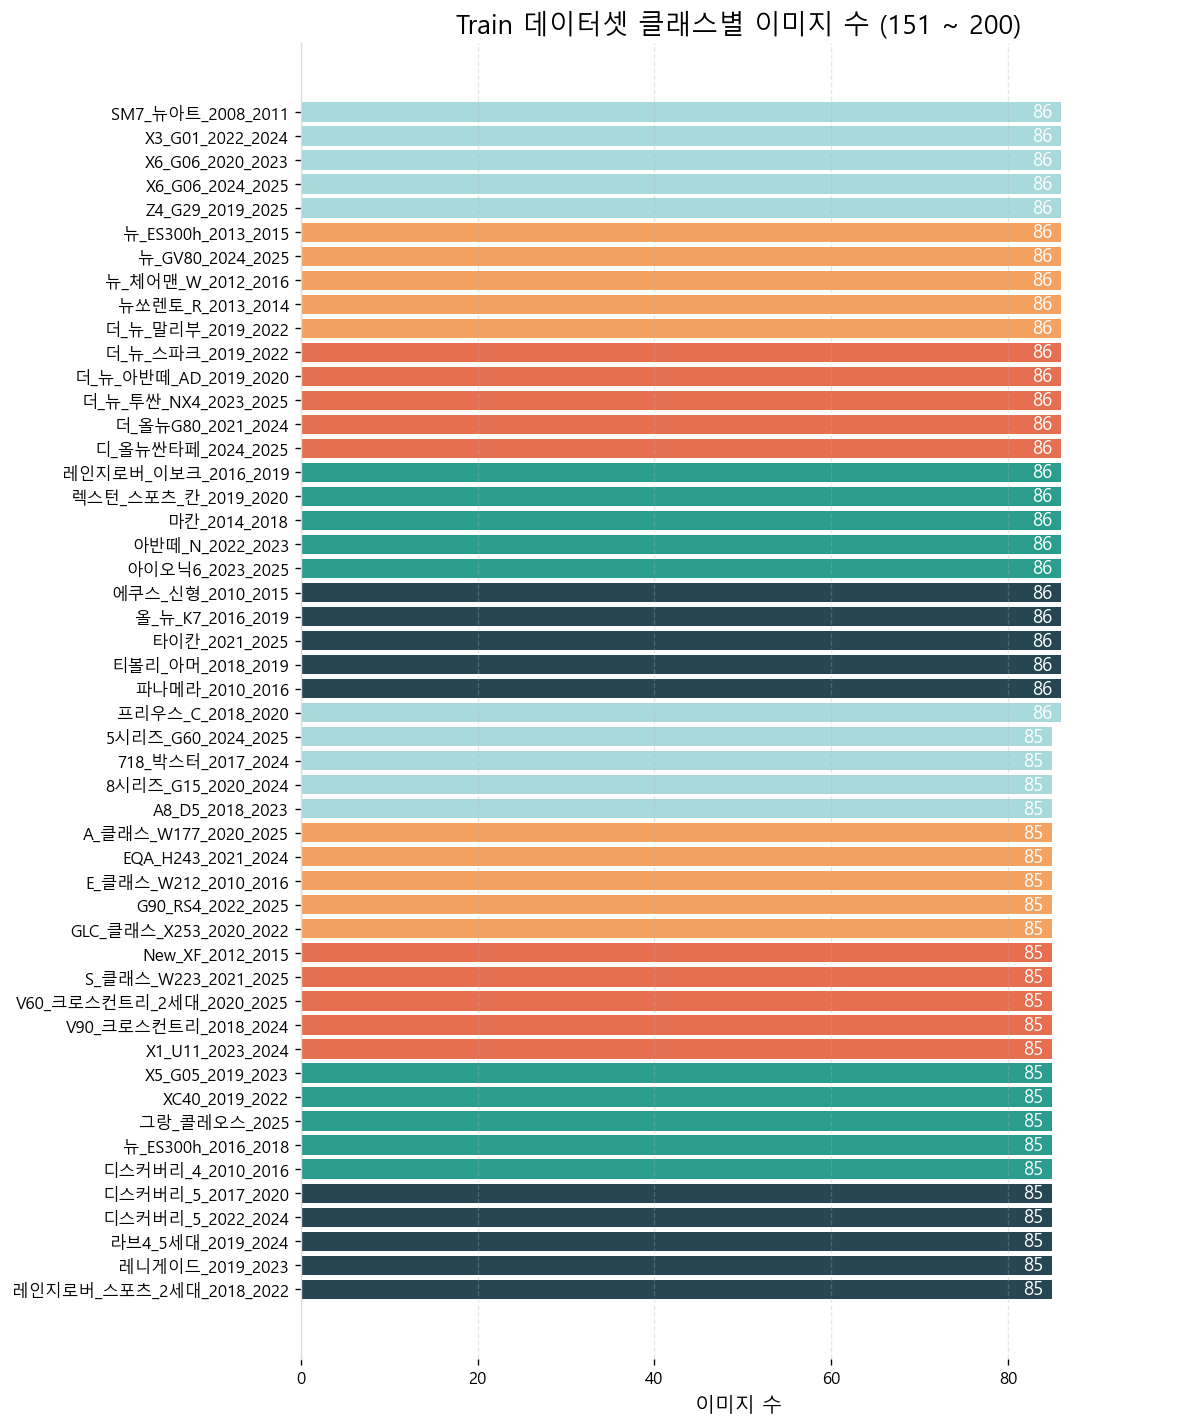

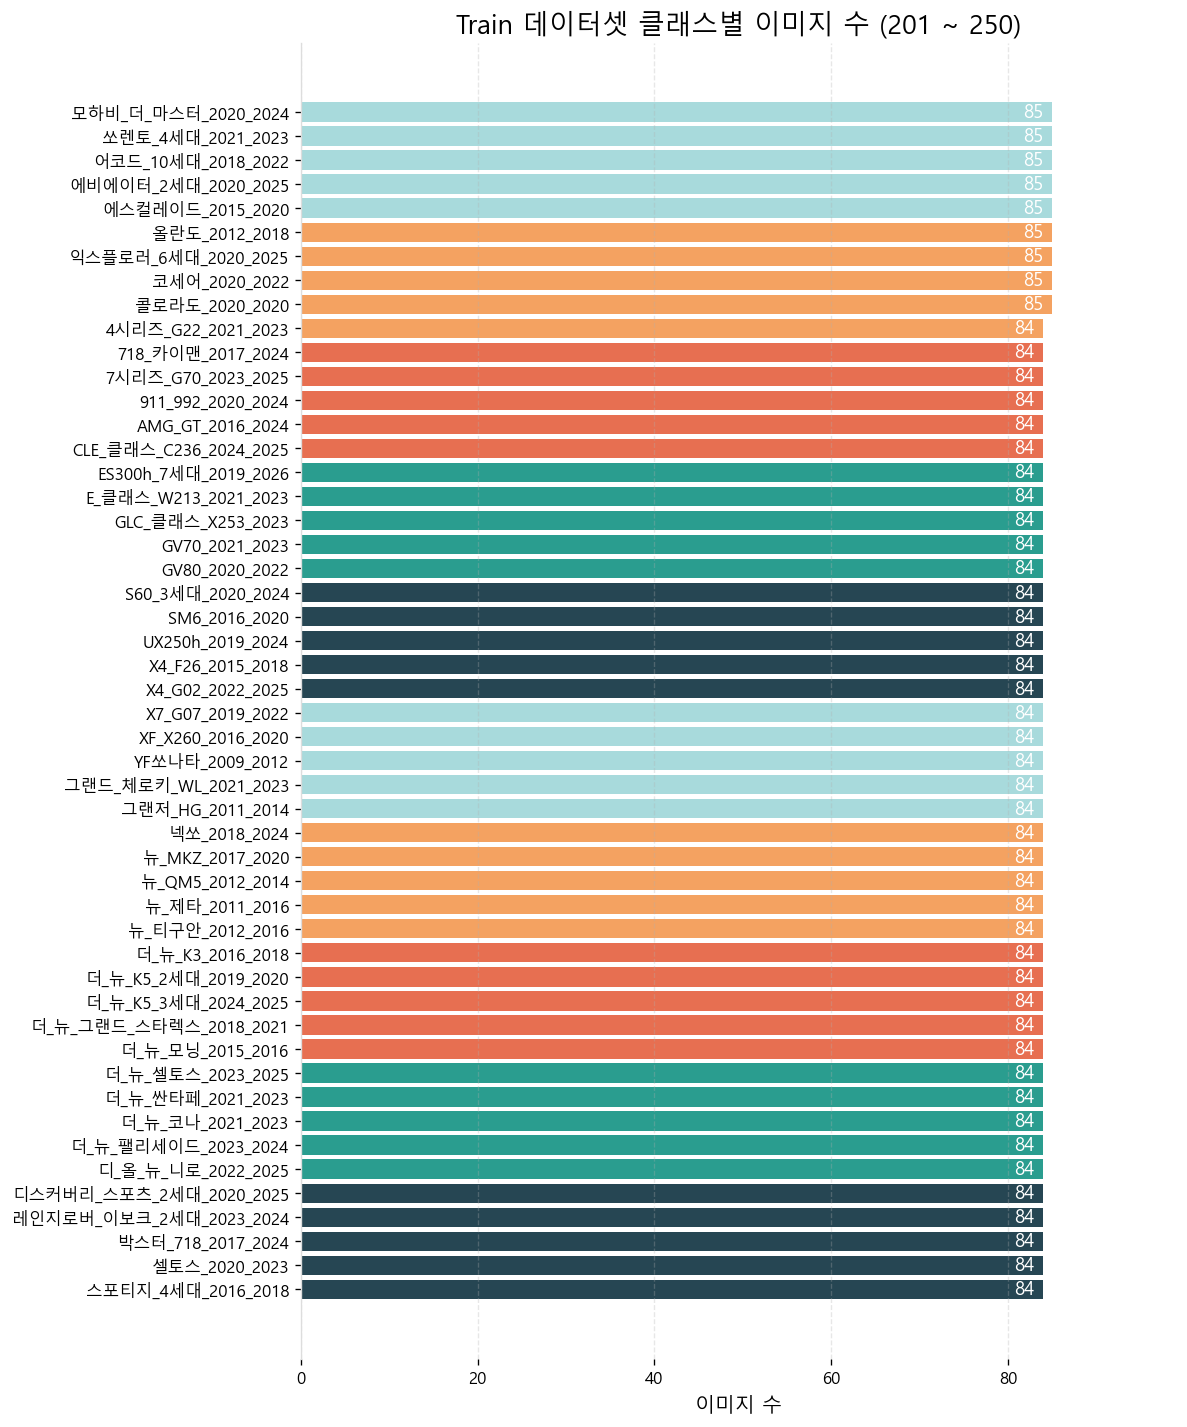

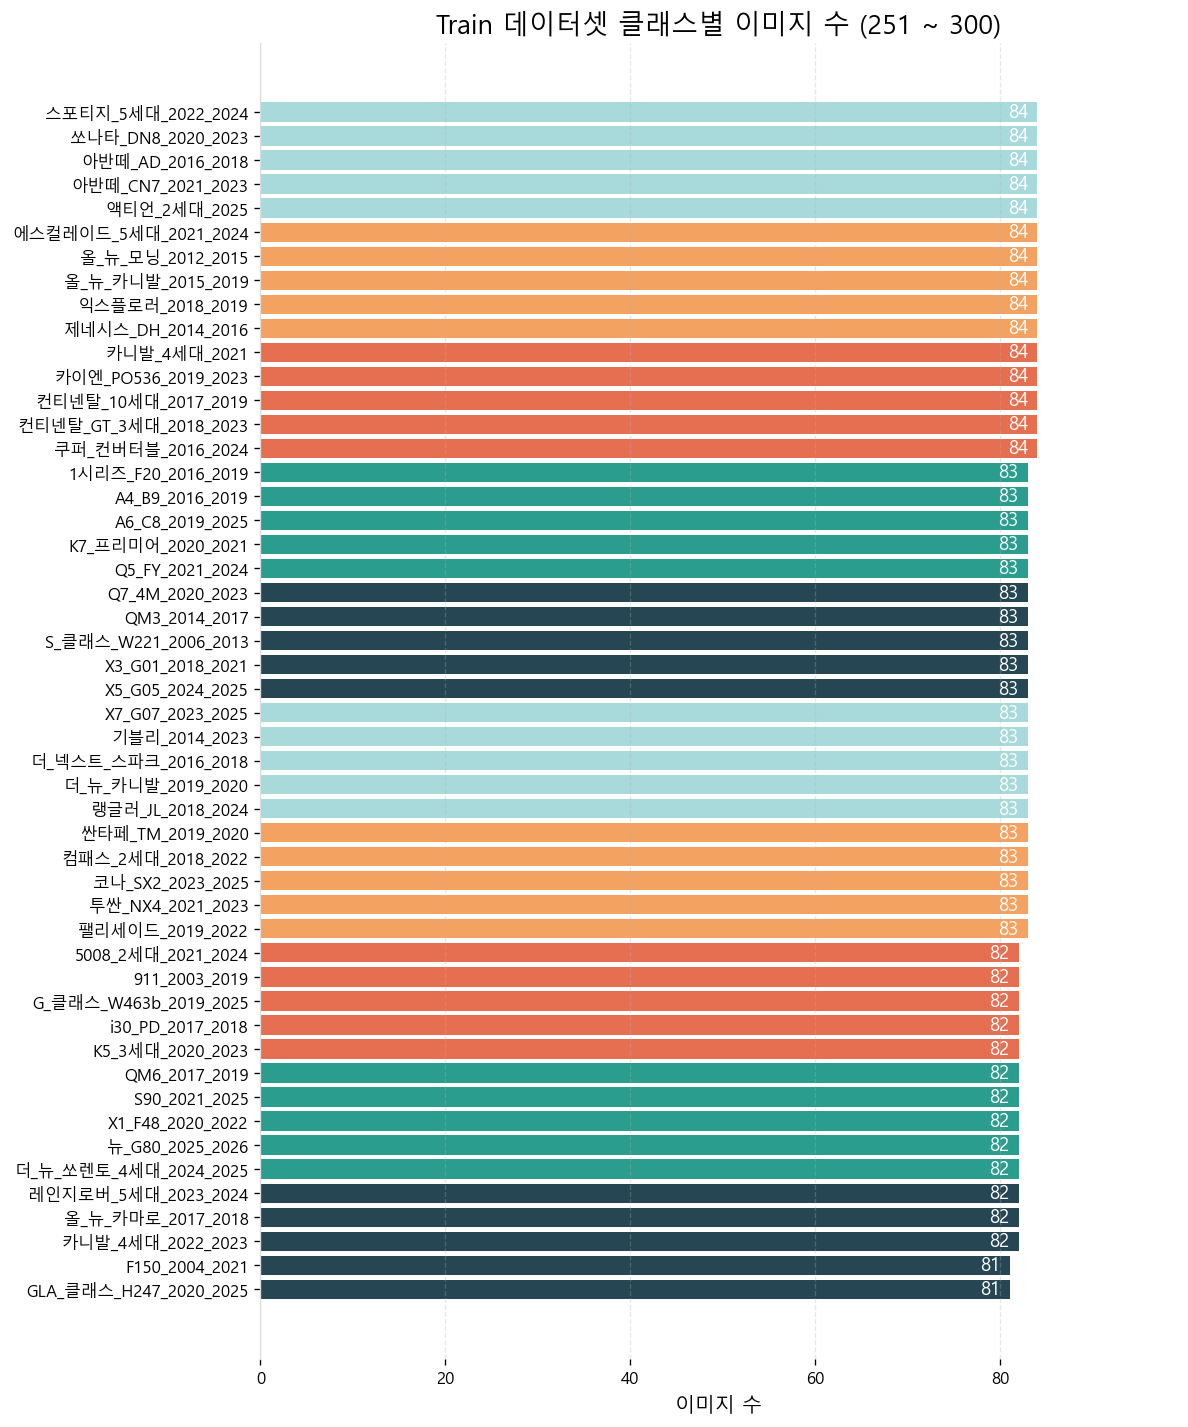

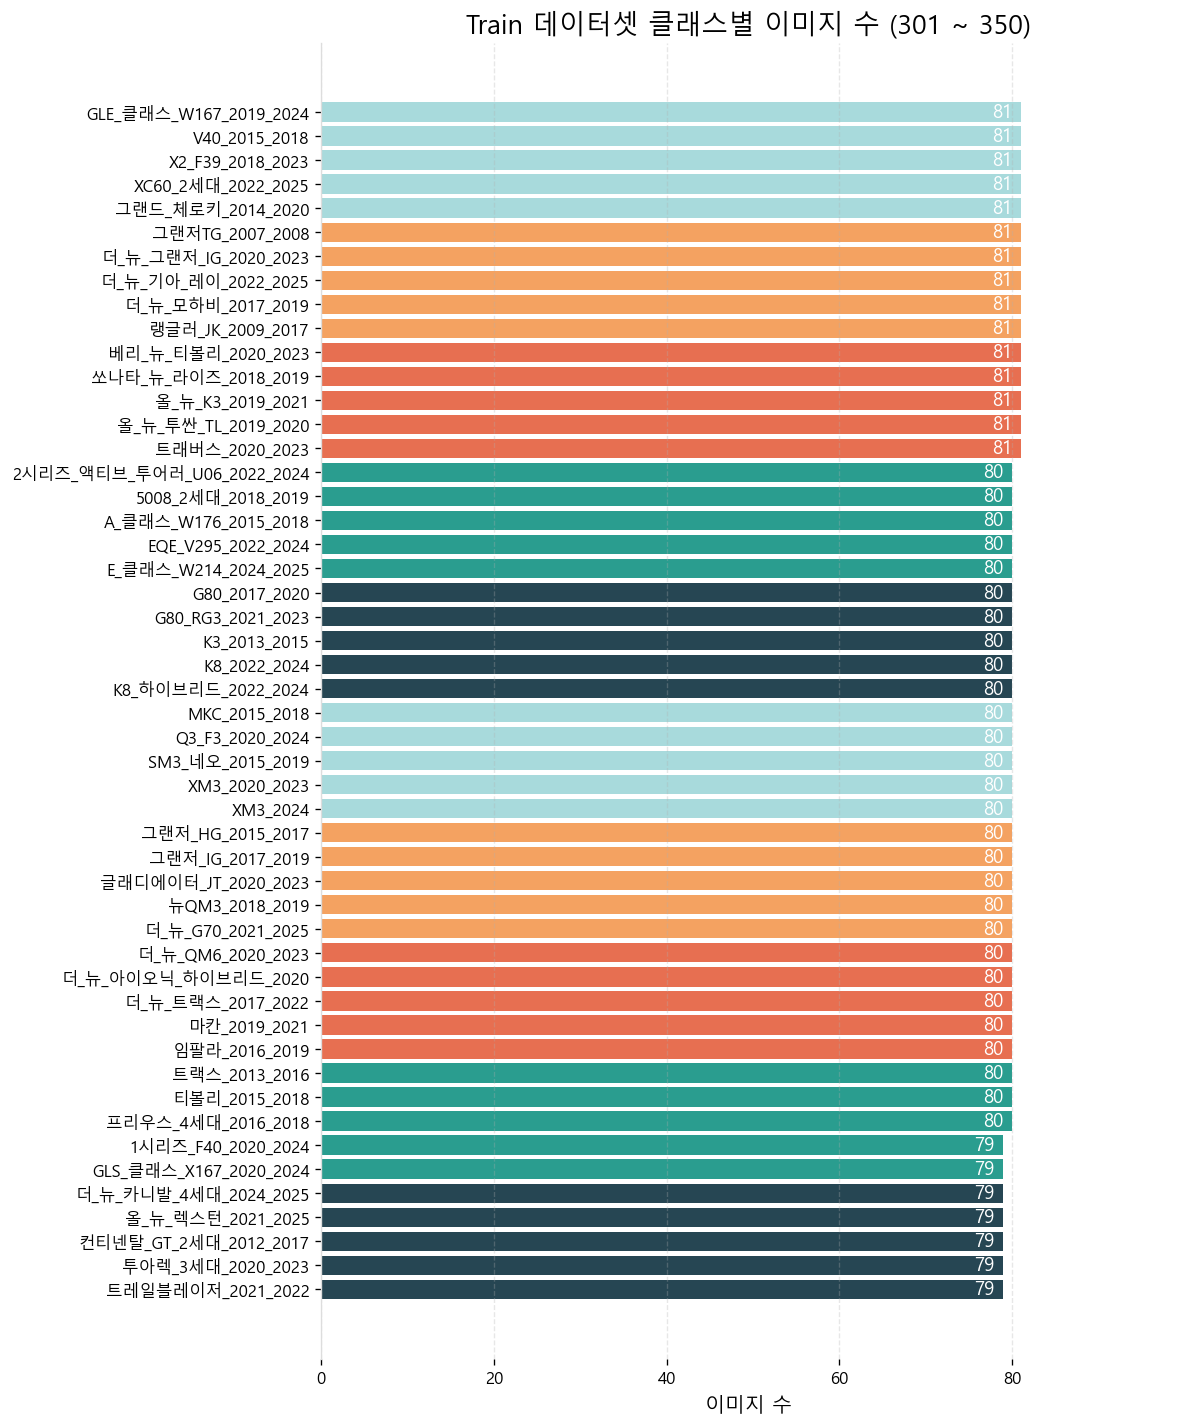

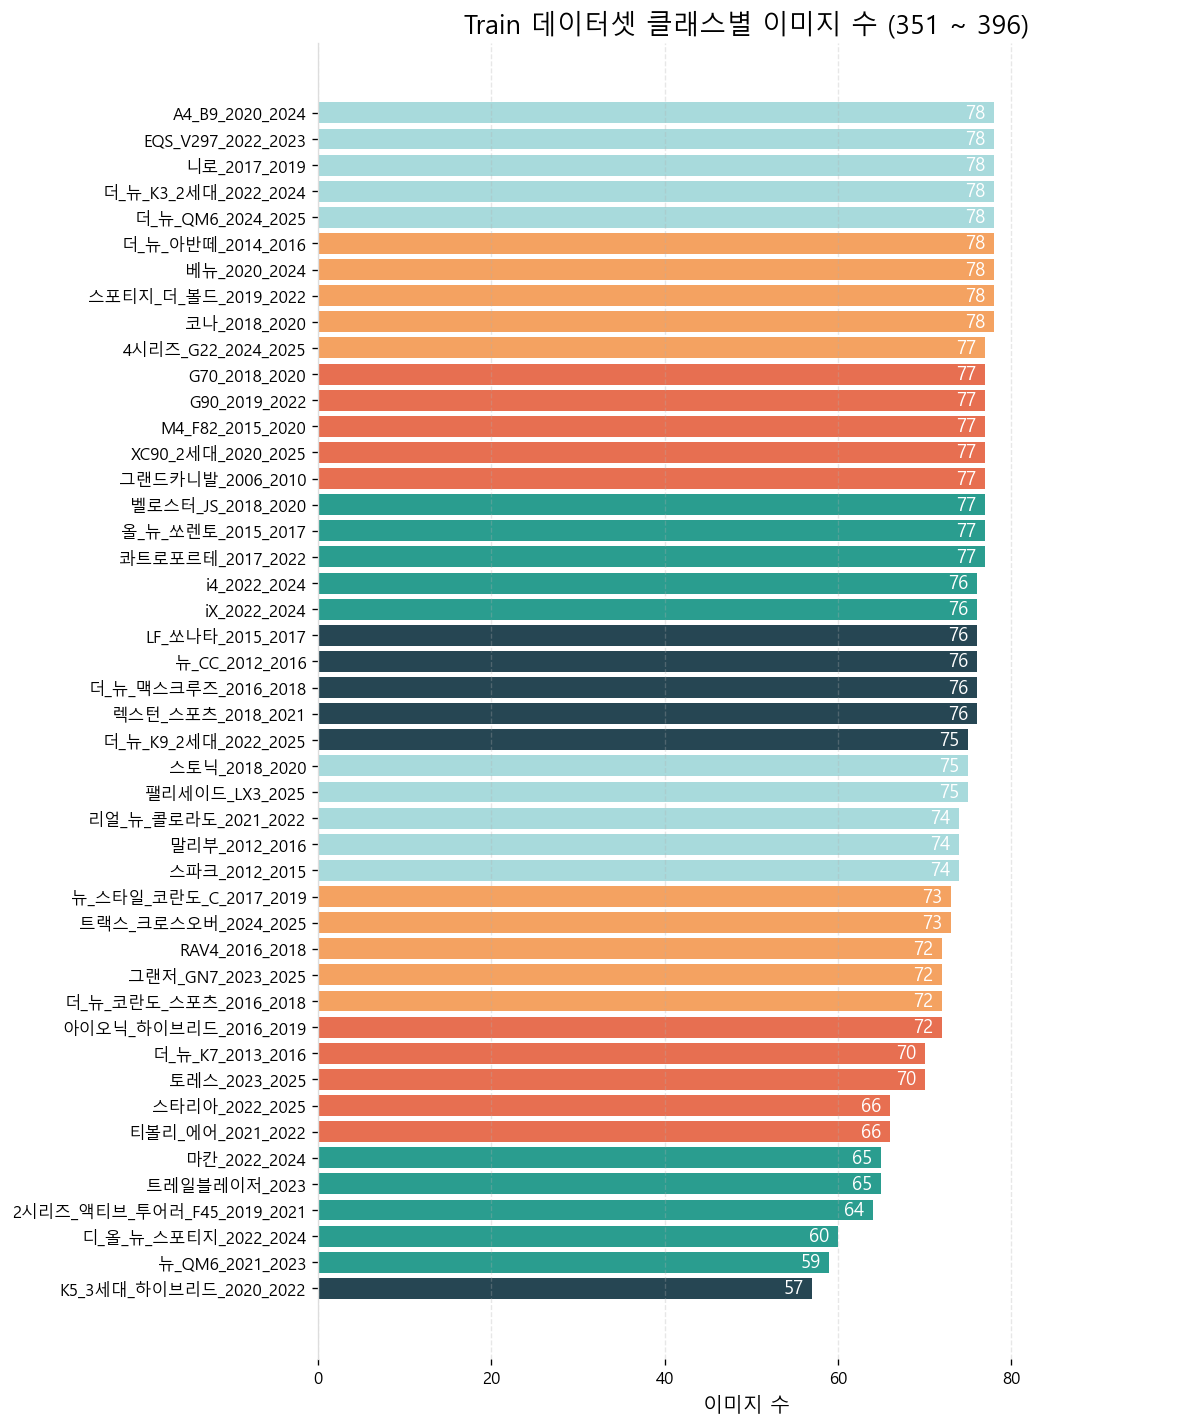

In [35]:
import os
import matplotlib.pyplot as plt

# 설정: 한글 폰트 및 마이너스 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 120

# 경로 설정 (예시 경로, 실제 경로에 맞게 수정 필요)
train_root = "./train"

# 클래스별 이미지 수 계산
class_counts = {}
for class_name in os.listdir(train_root):
    class_path = os.path.join(train_root, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = count

# 정렬된 클래스 및 이미지 수
sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
class_names, counts = zip(*sorted_counts)

# 색상 세트: 5개씩 반복할 색상
base_colors = ['#A8DADC', '#F4A261', '#E76F51', '#2A9D8F', '#264653']
colors = [base_colors[i // 5 % len(base_colors)] for i in range(len(class_names))]

# 그래프 분할 그리기 (50개씩)
figures = []
n_per_chart = 50
for i in range(0, len(class_names), n_per_chart):
    fig, ax = plt.subplots(figsize=(10, 12))
    names = class_names[i:i+n_per_chart]
    vals = counts[i:i+n_per_chart]
    part_colors = colors[i:i+n_per_chart]

    bars = ax.barh(names, vals, color=part_colors)
    ax.set_title(f"Train 데이터셋 클래스별 이미지 수 ({i+1} ~ {i+len(names)})", fontsize=16)
    ax.set_xlabel("이미지 수", fontsize=12)
    ax.invert_yaxis()

    # 카운트 숫자 추가 (오른쪽 정렬)
    for bar, count in zip(bars, vals):
        ax.text(bar.get_width() - 1, bar.get_y() + bar.get_height() / 2, str(count),
                va='center', ha='right', fontsize=11, color='white' if bar.get_width() > 20 else 'black')

    # 세부 조정
    ax.set_xlim(0, max(counts) * 1.1)
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    figures.append(fig)

plt.show()